Epoch: 0, Loss: 0.3299146323462066
Epoch: 1000, Loss: 0.20235336633898354
Epoch: 2000, Loss: 0.18428063169622994
Epoch: 3000, Loss: 0.1711633935716972
Epoch: 4000, Loss: 0.15764547290427838
Epoch: 5000, Loss: 0.1480150930356523
Epoch: 6000, Loss: 0.1426687324748789
Epoch: 7000, Loss: 0.13962346189591202
Epoch: 8000, Loss: 0.13772469117307062
Epoch: 9000, Loss: 0.13644207169085426


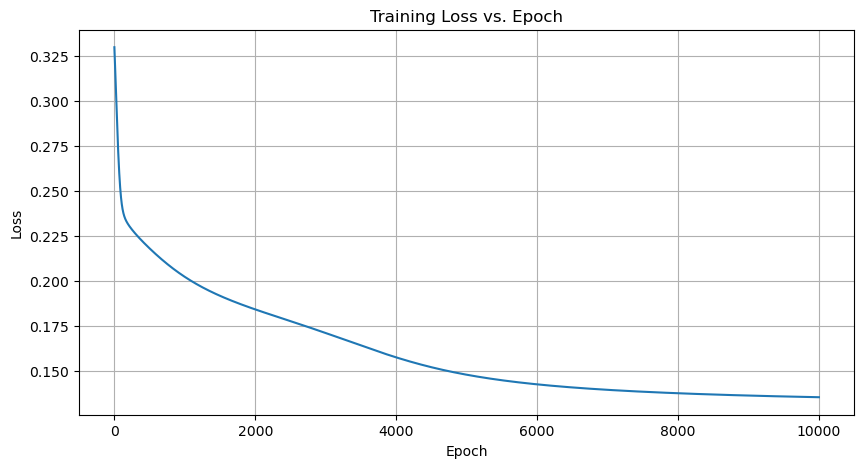

Accuracy: 0.5


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Y_train = np.array([
    [0],
    [1],
    [1],
    [0]
])

X_train = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

def pack_weights(w1, b1, w2, b2):
    return np.concatenate((w1.flatten(), b1.flatten(), w2.flatten(), b2.flatten()))

def unpack_weights(weights):
    w1 = weights[:4].reshape(2, 2)
    b1 = weights[4:6].reshape(1, 2)
    w2 = weights[6:8].reshape(2, 1)
    b2 = weights[8].reshape(1, 1)
    return w1, b1, w2, b2

def predict(w1, w2, b1, b2):
        z1 = np.dot(X_train, w1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, w2) + b2
        a2 = sigmoid(z2)

        return z1, a1, z2, a2
epochs=10000
alpha=0.1
def msegrd(weights):
    losses = []
    for epoch in range(epochs):
        w1, b1, w2, b2 = unpack_weights(weights)

        # Feedforward
        z1 = np.dot(X_train, w1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, w2) + b2
        a2 = sigmoid(z2)

        # Compute Loss
        loss = np.mean((a2 - Y_train)**2)
        losses.append(loss)

        # Backpropagation
        dJ_da2 = a2 - Y_train
        da2_dz2 = sigmoid_derivative(a2)
        dJ_dw2 = np.dot(a1.T, dJ_da2 * da2_dz2)
        
        dJ_da1 = np.dot(dJ_da2 * da2_dz2, w2.T)
        dJ_dw1 = np.dot(X_train.T, dJ_da1 * sigmoid_derivative(a1))

        # Update weights
        w1 -= alpha * dJ_dw1
        w2 -= alpha * dJ_dw2
        b1 -= alpha * np.sum(dJ_da1 * sigmoid_derivative(a1), axis=0)
        b2 -= alpha * np.sum(dJ_da2 * da2_dz2, axis=0)
    

        if epoch % 1000 == 0:
            print(f'Epoch: {epoch}, Loss: {loss}')

    return w1, b1, w2, b2, losses

# Training data

weights = np.random.randn(9)

w1, b1, w2, b2, losses = msegrd(weights)

plt.figure(figsize=(10,5))
plt.plot(losses)
plt.title('Training Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Making predictions
predictions = []
for x, y in zip(X_train, Y_train):
    z1, a1, z2, a2 = predict(w1, w2, b1, b2)
    predicted_class = np.where(a2 < 0.5, 0, 1)
    predictions.append(predicted_class)

predictions = np.where(a2 < 0.5, 0, 1)

accuracy = accuracy_score(Y_train, np.array(predictions))
print(f"Accuracy: {accuracy}")


